# REGRESSÃO LINEAR
### Intro
- Nesse exercício estou preparando e fazendo uma aprendizagem de máquina onde estou comparando dois algoritmos: Regressão Linear e Random Forest Regressor para uma base de dados de notas e horas estudadas de alunos.

In [157]:
import pandas as pd
data = pd.read_csv("treino_regressao.csv")
df = pd.DataFrame(data)

x_treino = df[["horas_estudo"]]
y_treino = df["nota_prova"]

# Treino do modelo

In [158]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
reg = modelo.fit(x_treino, y_treino)

print("Modelo treinado com sucesso!")

Modelo treinado com sucesso!


# Agora vamos usar uma base de teste

In [159]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
data_test = pd.read_csv("teste_regressao.csv")
df_test = pd.DataFrame(data_test)
x_test = df_test[["horas_estudo"]]
y_test = df_test["nota_prova"]
y_pred = modelo.predict(x_test)
df_test['nota_pred'] = y_pred
display(df_test)
mae_teste = mean_absolute_error(y_test, y_pred)
mse_teste = mean_squared_error(y_test, y_pred)
print(f"MAE: {(mae_teste)}")
print(f"MSE: {(mse_teste)}")
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"O erro percentual médio do modelo é: {mape * 100:.2f}%")



,horas_estudo,nota_prova,nota_pred
0,8.77,49.44,42.913688
1,6.61,34.47,32.568494
2,3.98,16.32,19.972263
3,1.57,9.83,8.429708
4,3.80,16.07,19.110163
5,3.93,21.99,19.732791
6,7.57,41.31,37.166358
7,6.74,31.23,33.191121
8,8.98,47.81,43.919471
9,5.25,27.49,26.054853


MAE: 2.3949531945693394
MSE: 8.775811846035676
O erro percentual médio do modelo é: 9.43%


In [160]:
# Veja quais colunas têm forte relação com a 'nota'
print(df.corr()['nota_prova'].sort_values(ascending=False))

nota_prova      1.000000
horas_estudo    0.980318
Name: nota_prova, dtype: float64


In [161]:
data_test = pd.read_csv("teste_regressao.csv")
df_test = pd.DataFrame(data_test)
df_limpo = df[df['horas_estudo'] < 9]
x_test = df_limpo[["horas_estudo"]]
y_test = df_limpo["nota_prova"]
y_pred = modelo.predict(x_test)
df_limpo['nota_pred_limpo'] = y_pred
display(df_limpo)
mae_teste = mean_absolute_error(y_test, y_pred)
mse_teste = mean_squared_error(y_test, y_pred)
print(f"MAE: {(mae_teste)}")
print(f"MSE: {(mse_teste)}")
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"O erro percentual médio do modelo é: {mape * 100:.2f}%")

/var/folders/ss/39nw7f_n6pzb5qv2141ftjqh0000gn/T/ipykernel_39222/4040615745.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpo['nota_pred_limpo'] = y_pred


,horas_estudo,nota_prova,nota_pred_limpo
0,4.37,22.12,21.840145
2,7.59,38.22,37.262147
3,6.39,25.98,31.514817
4,2.40,11.36,12.404945
5,2.40,13.09,12.404945
...,...,...,...
75,7.56,38.84,37.118464
76,7.94,37.67,38.938451
77,1.67,9.03,8.908653
78,4.23,22.01,21.169623


MAE: 2.0367730242634945
MSE: 7.132417226527029
O erro percentual médio do modelo é: 12.86%


# vamos aos gráficos

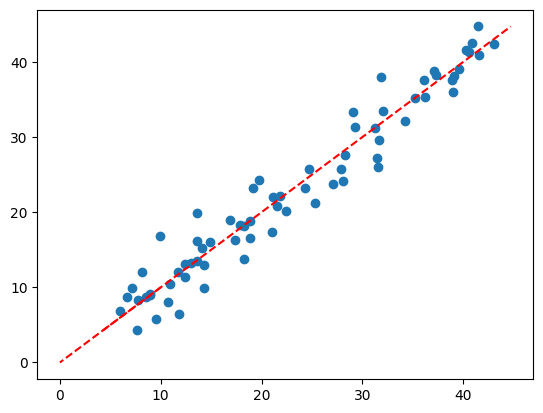

In [162]:
from matplotlib import pyplot as plt
# Visualizando a relação do y_test com o y_pred
fig,ax = plt.subplots()
ax.scatter(y_pred,y_test)
ax.plot([10,0],[10,0],'--r')
ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
plt.show()


# Mudando de algoritimo para random flores

In [163]:
#treino do modelo
from sklearn.ensemble import RandomForestRegressor
model_florest = RandomForestRegressor(n_estimators=100, random_state=42)
model_florest.fit(x_treino, y_treino)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [164]:
y_prev = model_florest.predict(x_test)
df_limpo['random_florest_alg'] = y_prev
error = mean_absolute_percentage_error(y_test, y_prev)
display(df_limpo)

/var/folders/ss/39nw7f_n6pzb5qv2141ftjqh0000gn/T/ipykernel_39222/2053192588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpo['random_florest_alg'] = y_prev


,horas_estudo,nota_prova,nota_pred_limpo,random_florest_alg
0,4.37,22.12,21.840145,21.723800
2,7.59,38.22,37.262147,38.026000
3,6.39,25.98,31.514817,26.755900
4,2.40,11.36,12.404945,12.008430
5,2.40,13.09,12.404945,12.008430
...,...,...,...,...
75,7.56,38.84,37.118464,38.317400
76,7.94,37.67,38.938451,37.320100
77,1.67,9.03,8.908653,9.076017
78,4.23,22.01,21.169623,20.797800


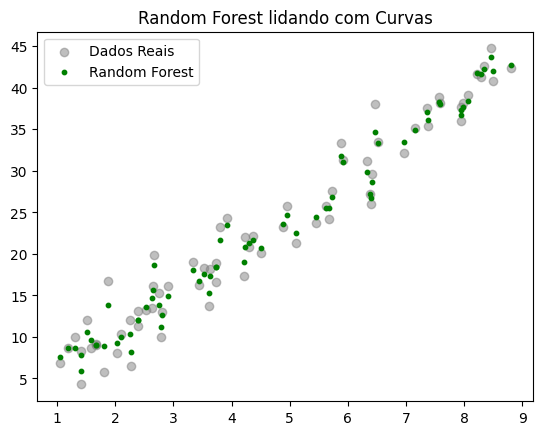

In [ ]:
# Vamos comparar visualmente?
import matplotlib.pyplot as plt
plt.scatter(x_test, y_test, color='blue', label='Dados Reais', alpha=0.5)
plt.scatter(x_test, y_prev, color='green', label='Random Forest', s=10)
plt.title("Random Forest lidando com Curvas")
plt.legend()
plt.show()